In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
A1G = pd.read_csv("../CSVs/A1G.F.csv")

In [4]:
BA = pd.read_csv("../Resources/BA.csv")

In [5]:
CSX = pd.read_csv("../CSVs/CSX.csv")

In [6]:
GM = pd.read_csv("../CSVs/GM.csv")

In [7]:
A1G = A1G.dropna()
print(f'A1G:')
print(A1G.head())

A1G:
       Date       Open       High        Low      Close  Adj Close  Volume
0  1/2/2019  27.809999  28.650000  27.549999  28.650000  28.251038     4.0
1  1/3/2019  27.570000  27.570000  25.969999  26.250000  25.884460     5.0
2  1/4/2019  26.200001  27.059999  26.200001  27.059999  26.683180     0.0
3  1/7/2019  27.959999  27.959999  27.900000  27.940001  27.550928   178.0
4  1/8/2019  28.620001  29.010000  28.620001  28.879999  28.477835   100.0


In [8]:
BA = BA.drop(BA.columns[0], axis = 1)
BA = BA.dropna()
print(f'BA:')
print(BA.head())

BA:
       Date        Open        High         Low       Close   Adj Close  \
1  1/3/2019  319.489990  319.739990  309.399994  310.899994  303.897919   
2  1/4/2019  316.690002  328.440002  316.079987  327.079987  319.713531   
3  1/7/2019  330.519989  330.690002  323.350006  328.109985  320.720306   
4  1/8/2019  334.109985  341.250000  332.649994  340.529999  332.860657   
5  1/9/2019  342.959991  347.200012  340.869995  343.829987  336.086273   

    Volume        P/N  Daily_Change  Daily_%_Change  Future_Change  
1  5705600  Negative     -12.910004       -3.986907      16.179993  
2  4448800   Positive     16.179993        5.204244       1.029998  
3  4030300   Positive      1.029998        0.314907      12.420014  
4  4736500   Positive     12.420014        3.785320       3.299988  
5  4213900   Positive      3.299988        0.969074       8.779998  


In [9]:
CSX = CSX.dropna()
print(f'CSX:')
print(CSX.head())

CSX:
         Date       Open       High        Low      Close  Adj Close   Volume
0  2019-01-02  60.759998  62.250000  60.020000  61.950001  61.114838  5012900
1  2019-01-03  61.360001  61.810001  60.360001  60.980000  60.157917  7842400
2  2019-01-04  61.000000  62.830002  60.529999  62.790001  61.943512  6181200
3  2019-01-07  62.430000  63.070000  61.349998  62.450001  61.608097  6262300
4  2019-01-08  63.779999  64.180000  62.639999  63.349998  62.495960  5079300


In [10]:
GM = GM.dropna()
print(f'GM')
print(GM.head())

GM
         Date       Open       High        Low      Close  Adj Close    Volume
0  2019-01-02  32.849998  33.810001  32.410000  33.639999  32.282429   7662300
1  2019-01-03  33.340000  33.680000  32.200001  32.250000  30.948524  11618300
2  2019-01-04  32.799999  33.570000  32.430000  33.330002  31.984938  10784000
3  2019-01-07  33.709999  34.970001  33.480000  34.360001  32.973373  10722300
4  2019-01-08  35.000000  35.680000  34.490002  34.810001  33.405216  10532900


In [11]:
A1G_X = A1G["Volume"].values.reshape(-1, 1)
A1G_y = A1G["Close"].values.reshape(-1, 1)
print(A1G_X.shape,A1G_y.shape)

(272, 1) (272, 1)


In [12]:
CSX_X = CSX["Volume"].values.reshape(-1, 1)
CSX_y = CSX["Close"].values.reshape(-1, 1)
print(CSX_X.shape,CSX_y.shape)

(273, 1) (273, 1)


In [13]:
BA_X = BA["Volume"].values.reshape(-1, 1)
BA_y = BA["Close"].values.reshape(-1, 1)
print(BA_X.shape,BA_y.shape)

(250, 1) (250, 1)


In [14]:
GM_X = GM['Volume'].values.reshape(-1,1)
GM_y = GM['Close'].values.reshape(-1,1)
print(GM_X.shape,GM_y.shape)

(274, 1) (274, 1)


Text(0, 0.5, 'Closing Price')

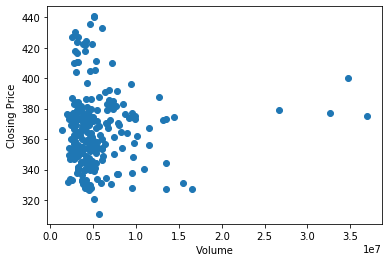

In [15]:
#checking the trends
plt.scatter(BA_X, BA_y)
plt.xlabel("Volume")
plt.ylabel("Closing Price")

Text(0, 0.5, 'Closing Price')

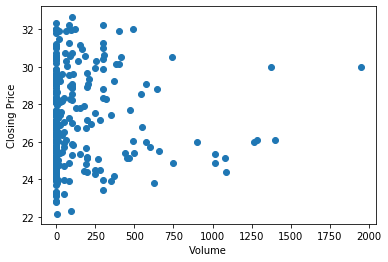

In [16]:
plt.scatter(A1G_X, A1G_y)
plt.xlabel("Volume")
plt.ylabel("Closing Price")

Text(0, 0.5, 'Closing Price')

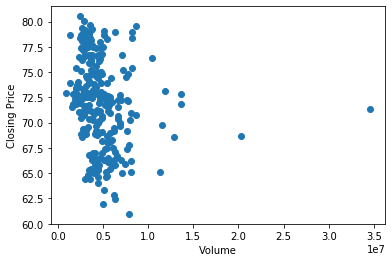

In [17]:
plt.scatter(CSX_X, CSX_y)
plt.xlabel("Volume")
plt.ylabel("Closing Price")

Text(0, 0.5, 'Closing Price')

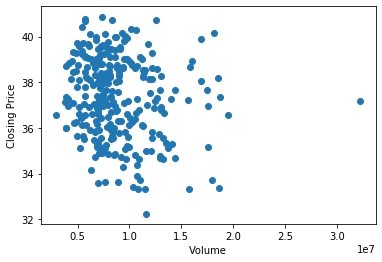

In [18]:
plt.scatter(GM_X,GM_y)
plt.xlabel("Volume")
plt.ylabel("Closing Price")

In [19]:
X_train, X_test, y_train, y_test = train_test_split(GM_X, GM_y)
myModel1 = LinearRegression()

In [20]:
myModel1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
predicted = myModel1.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 2.7010545004420523
R-squared (R2 ): -0.07085969118309965


In [22]:
myModel1.score(X_test, y_test)

-0.07085969118309965

In [23]:
X_train, X_test, y_train, y_test = train_test_split(A1G_X, A1G_y)
myModel2 = LinearRegression()

In [24]:
myModel2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
predicted = myModel2.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 7.680174883107344
R-squared (R2 ): -0.012720087617545506


In [26]:
myModel2.score(X_test, y_test)

-0.012720087617545506

In [27]:
X_train, X_test, y_train, y_test = train_test_split(BA_X, BA_y)
myModel3 = LinearRegression()

In [28]:
myModel3.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
predicted = myModel3.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 522.1824626050881
R-squared (R2 ): -0.0577611842323944


In [30]:
myModel3.score(X_test, y_test)

-0.0577611842323944

In [31]:
X_train, X_test, y_train, y_test = train_test_split(CSX_X, CSX_y)
myModel4 = LinearRegression()

In [32]:
myModel4.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
predicted = myModel4.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 17.207274288919745
R-squared (R2 ): 0.022201006828479586


In [34]:
myModel4.score(X_test, y_test)

0.022201006828479586

Adding New Columns for A1G, CSX, GM

In [35]:
CSX["P/N"] = np.where(CSX.eval("Open < Close"), "Positive", "Negative ")
CSX['Daily_Change'] = CSX.Close.diff()
CSX['Daily_%_Change'] = CSX.Close.pct_change() * 100
CSX['Future_Change'] = CSX.Close.diff(periods=-1) * -1
print('CSX:')
CSX.head()


CSX:


,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change
0,2019-01-02,60.759998,62.250000,60.020000,61.950001,61.114838,5012900,Positive,NaN,NaN,-0.970001
1,2019-01-03,61.360001,61.810001,60.360001,60.980000,60.157917,7842400,Negative,-0.970001,-1.565780,1.810001
2,2019-01-04,61.000000,62.830002,60.529999,62.790001,61.943512,6181200,Positive,1.810001,2.968188,-0.340000
3,2019-01-07,62.430000,63.070000,61.349998,62.450001,61.608097,6262300,Positive,-0.340000,-0.541487,0.899997
4,2019-01-08,63.779999,64.180000,62.639999,63.349998,62.495960,5079300,Negative,0.899997,1.441148,0.630002


In [36]:
A1G["P/N"] = np.where(A1G.eval("Open < Close"), "Positive", "Negative ")
A1G['Daily_Change'] = A1G.Close.diff()
A1G['Daily_%_Change'] = A1G.Close.pct_change() * 100
A1G['Future_Change'] = A1G.Close.diff(periods=-1) * -1
print('A1G:')
A1G.head()


A1G:


,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change
0,1/2/2019,27.809999,28.650000,27.549999,28.650000,28.251038,4.0,Positive,NaN,NaN,-2.400000
1,1/3/2019,27.570000,27.570000,25.969999,26.250000,25.884460,5.0,Negative,-2.400000,-8.376963,0.809999
2,1/4/2019,26.200001,27.059999,26.200001,27.059999,26.683180,0.0,Positive,0.809999,3.085710,0.880002
3,1/7/2019,27.959999,27.959999,27.900000,27.940001,27.550928,178.0,Negative,0.880002,3.252040,0.939998
4,1/8/2019,28.620001,29.010000,28.620001,28.879999,28.477835,100.0,Positive,0.939998,3.364345,-0.479999


In [37]:
GM["P/N"] = np.where(GM.eval("Open < Close"), "Positive", "Negative ")
GM['Daily_Change'] = GM.Close.diff()
GM['Daily_%_Change'] = GM.Close.pct_change() * 100
GM['Future_Change'] = GM.Close.diff(periods=-1) * -1
print('GM:')
GM.head()


GM:


,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change
0,2019-01-02,32.849998,33.810001,32.410000,33.639999,32.282429,7662300,Positive,NaN,NaN,-1.389999
1,2019-01-03,33.340000,33.680000,32.200001,32.250000,30.948524,11618300,Negative,-1.389999,-4.131983,1.080002
2,2019-01-04,32.799999,33.570000,32.430000,33.330002,31.984938,10784000,Positive,1.080002,3.348843,1.029999
3,2019-01-07,33.709999,34.970001,33.480000,34.360001,32.973373,10722300,Positive,1.029999,3.090306,0.450000
4,2019-01-08,35.000000,35.680000,34.490002,34.810001,33.405216,10532900,Negative,0.450000,1.309662,0.369999


In [40]:
GM.to_csv("../CSVs/GMrevised.csv", index = False)
CSX.to_csv("../CSVs/CSXrevised.csv", index = False)
A1G.to_csv("../CSVs/A1Grevised.csv", index = False)
BA.to_csv("../CSVs/BArevised.csv", index = False)